<a href="https://colab.research.google.com/github/skdding3/CSAI_assignment/blob/main/n214a_sunki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import sklearn

sklearn.__version__

'0.22.2.post1'

In [82]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';').iloc[:,1:]

In [83]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [84]:
df.isnull().sum() #missing value

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [85]:


df.drop_duplicates(inplace = True)  #중복 제거

In [86]:
df.shape #dimension

(69976, 12)

### 2) 

In [87]:
from sklearn.model_selection import train_test_split

target = 'cardio'

train, test = train_test_split(df, test_size=0.2, train_size=0.8, random_state=2)
train, valid = train_test_split(train, train_size = 0.8, random_state = 2)
print('train shape: ', train.shape) #train
print('test shape: ', test.shape)  #test
print('valid shape' , valid.shape) #X_val

train shape:  (44784, 12)
test shape:  (13996, 12)
valid shape (11196, 12)


### 3) 

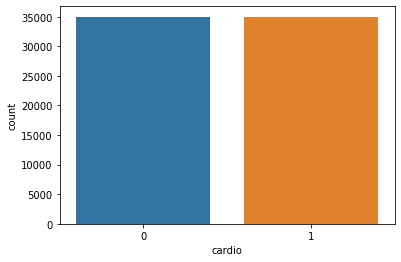

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

df['cardio'].value_counts(normalize=True)/69976 #base model


sns.countplot(x=df['cardio']); #target ratio

In [89]:
features = df.columns[:-1]
X_train = train[features]
X_valid = valid[features]
X_test = test[features]

y_valid = valid[target]
y_train = train[target]
y_test = test[features]

y_train.value_counts(normalize=True)

1    0.501697
0    0.498303
Name: cardio, dtype: float64

In [90]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
logistic.score(X_valid, y_valid)

0.7073061807788495

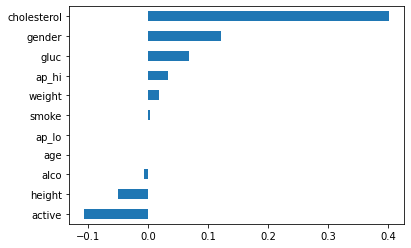

In [92]:
coefficients = pd.Series(logistic.coef_[0], X_train.columns) #cholesterol coef
coefficients.sort_values().plot.barh();

In [93]:
logistic.score(X_valid, y_valid) #validation set

0.7073061807788495

### 4)

In [94]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.0MB/s 


In [95]:
from category_encoders import OneHotEncoder;

encoder = OneHotEncoder(cols = 'gender', use_cat_names = True) #category_encoders를 사용해서 'gender' 특성만 원핫인코딩

X_train_encoded = encoder.fit_transform(X_train)
X_valid_encoded = encoder.transform(X_valid)

logistic.fit(X_train_encoded,y_train) #replay fit method
y_pred = logistic.predict(X_valid_encoded)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [96]:
accuracy_score(y_valid, y_pred)

0.6944444444444444

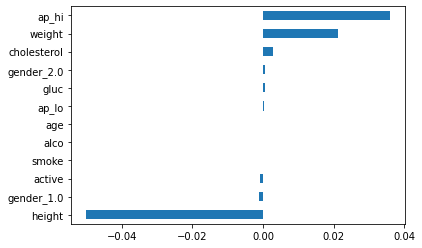

In [97]:
coefficients = pd.Series(logistic.coef_[0], X_train_encoded.columns) #ap_hi , weight , cholesterol coef

coefficients.sort_values().plot.barh();

###

### 5) 

In [98]:
scaler = StandardScaler()   #Standard Scaler
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)


logistic.fit(X_train_scaled, y_train)
y_pred=logistic.predict(X_valid_scaled)
accuracy_score(y_valid, y_pred)  #validation  test : 0.7264218348099457

0.723383351196856

In [99]:
X_test_scaled = scaler.transform(X_test)

logistic.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 🔥 

### 6) 

In [100]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


생로병사의 비밀에서 봤었는데, 심혈관 질환에는 BMI 영향이 있을거같음.

bmi = weight/height ** 2

In [19]:
df['bmi'] = (df['weight']/(df['height']*0.01)**2)

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


count    69976.000000
mean        27.557610
std          6.092210
min          3.471784
25%         23.875115
50%         26.391837
75%         30.222222
max        298.666667
Name: bmi, dtype: float64


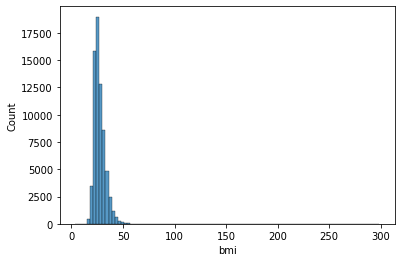

In [20]:
print(df['bmi'].describe())

sns.histplot(data = df, x = 'bmi', bins = 100)
plt.show()

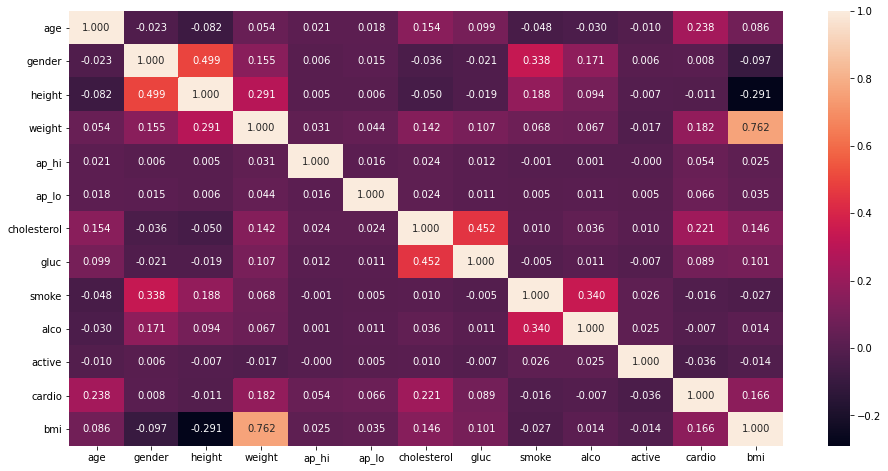

In [21]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, fmt='.3f')  #corr

In [22]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

y = df["cardio"]
X = df.drop(["cardio"], axis = 1)
X = normalize(X)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=8017)


## 이상치 확인 절차

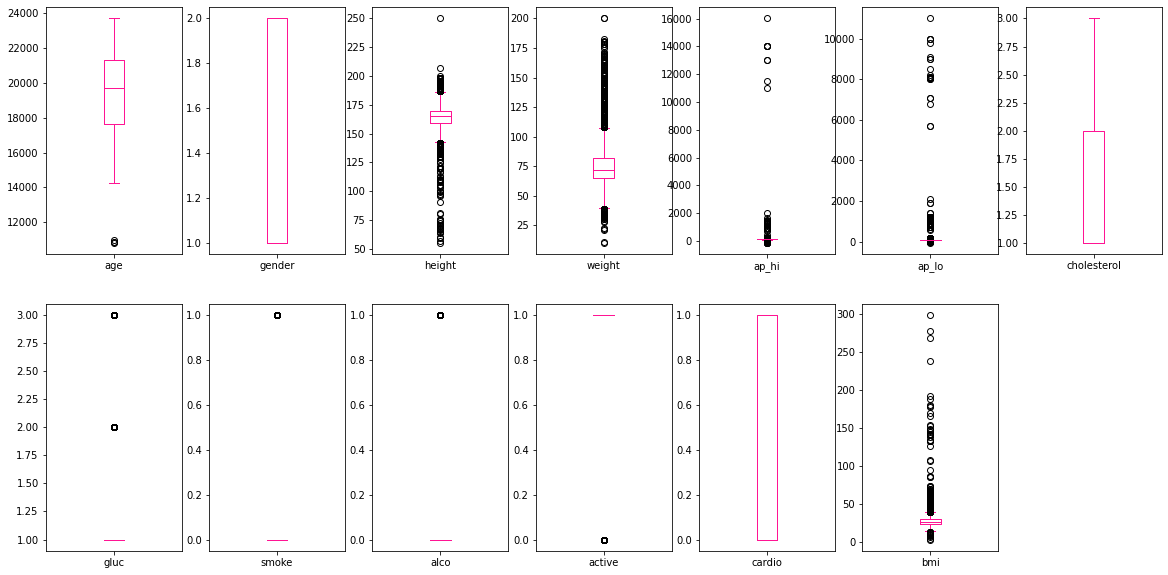

In [23]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

In [24]:
import numpy as np

# define continuous variable & plot
continous_features = ['age','cholesterol']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 4
For the feature cholesterol, No of Outliers is 0


In [25]:
outliers(df[continous_features],drop=True)

Outliers from age feature removed
Outliers from cholesterol feature removed


#Feature Scaling

In [26]:
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
log = LogisticRegression(solver="liblinear", max_iter=200)

models = {"Decision tree" : dtc,
          "KNN" : knn,
          "Logistic" : log}
scores= { }

for key, value in models.items():    
    model = value
    accuracies = cross_val_score(estimator=value, X=X_train_val, y=y_train_val, cv=4)
    scores[key] = round(sum(accuracies)/len(accuracies), 4)
    print("done. run {}".format(key))

done. run Decision tree
done. run KNN
done. run Logistic


In [27]:
print(scores)

{'Decision tree': 0.631, 'KNN': 0.6834, 'Logistic': 0.6101}


In [28]:
grid = {"n_neighbors" : np.arange(2,40,2)}  #knn tuning
knn_grid = GridSearchCV(knn, grid, cv=4)
knn_grid.fit(X_train_val,y_train_val)

print("Best n_neighbors: {}".format(knn_grid.best_params_)) 
print("Best score: {}".format(knn_grid.best_score_))

Best n_neighbors: {'n_neighbors': 32}
Best score: 0.7147374062165058


knn 모델이 가장 높아 최적화(tuning)을 거쳐 정확도 71퍼를 도출